<h1 style="font-family:Impact,Arial;font-size:100px;">New York City: Political Finance Analysis</h1>
<h2 style="font-family:Arial;">Miles Bartnik</h2>
<h2 style="font-family:Arial;">13612130</h2>
<p><small> 37373 Programming for Data Analysis</small></p>
<p><small><font color=MediumVioletRed>Autumn 2020</font></small>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

# Abstract

The main goal of this project is to explore the influences and outcomes of financing in New York politics over the most recent election cycle. This will be achieved by exploring the relationship between political donations and contracts awarded on behalf of the NYC government. 

The exploratory data analysis will focus on the geographic distribution of donations and contracts awarded to determine the regions with the most interest in the NYC government and how that interest is rewarded. This project will also determine the characteristics of those who are donating directly to NYC politicians. 

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>1. Motivation</h1>

I have always had a passion for politics, and how the system operates outide the public view. You can often gain much greater insight into the motivations and actions of a politician by understanding their support base, their fundraiser attendees, and their factional powerbrokers. In particular, I have always wanted to determine what effect, if any, the American culture of political donations, fundraising events, and Political Action Committees (PACs) have on American politics. 

There is a perception of politics that being an insider to the process grants certain benefits elsewhere when it comes to how the government of the day will remember who put them there, whether it is by certain policies or directly awarding their supporters lucrative contracts. I want to determine if this belief has any basis in reality by exploring the relationships between campaign contributions and contracts awarded on behalf of New York to see the extent of these relationships or if they exist at all. 

I also want to gain a better understanding of the NYC political landscape, who the important members are on both the political front and the fundraising scene, and look at what implications this may have for the upcoming 2021 NYC elections. 

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>2. The Data</h1>

For this analysis, we will be using two datasets from the [NYC Open Data](https://data.cityofnewyork.us) portal.

| Dataset Name | Link | Rows | Columns | Description |
|--------------|------|------|---------|-------------|
| 2021 Campaign Contributions | [2021 Campaign Contributions](https://data.cityofnewyork.us/City-Government/2021-Campaign-Contributions/rjkp-yttg) | 84800 | 52 | Contributions to 2021 NYC election campaigns |
| Recent Contract Awards | [Recent Contract Awards](https://data.cityofnewyork.us/City-Government/Recent-Contract-Awards/qyyg-4tf5)| 35600 | 37 | The Office of Citywide Purchasing (OCP) solicits and awards contracts for a wide variety of goods and services on behalf of all City agencies |


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>3. Data Preparation</h1>

**Non Standard Dependencies**

There are some non standard imports this notebook makes use of that will need to be installed through the following terminal commands. They are as follows:
<br>
geopy (Address Processing)- `pip install geopy`
<br>
ipyleaflet (Mapping)- `pip install ipyleaflet`
<br>
Folium (Mapping)- `pip install folium`
<br>
branca (Color Mapping)- `pip install branca`


In [1]:
#Define all imports
import pandas as pd
import pathlib as Path
import numpy as np
import re

#Required for Nominatim Address Conversion
import time
import geopy
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent='myGeocoder')

#Required for plotting
import math
import matplotlib.pyplot as plt
import folium
from folium import plugins
import branca.colormap as branca_folium_cm
from shapely.geometry import Point

#Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

#Allow pandas to display all data
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)

<hr style="height:5px;border:none;color:#333;background-color:#333;" />

**Importing The Data**

The data dictionaries for NYC Open Data datasets are .xlsx files with multiple sheets. To obtain the data dictionary on its own, we must strip this sheet out of the .xlsx file

In [2]:
#Define a short function to strip the data dictionary page out of the .xlsx file
def get_nyc_data_dict(url,sheet_index):
    return pd.ExcelFile(url).parse(sheet_index, skiprows=1)


#Obtain NYC Recent Contracts Data
contract_data = pd.read_csv('https://data.cityofnewyork.us/api/views/qyyg-4tf5/rows.csv?accessType=DOWNLOAD')
contract_data_dictionary = get_nyc_data_dict('https://data.cityofnewyork.us/api/views/qyyg-4tf5/files/ba9ac4ad-3b32-430f-85b5-8b9095e2fedd?download=true&filename=City_Record_Online_-_Data_Dictionary_-_October_2017.xlsx',1)

#Obtain NYC 2021 Donation Data
donation_data = pd.read_csv('https://data.cityofnewyork.us/api/views/rjkp-yttg/rows.csv?accessType=DOWNLOAD')
donation_data_dictionary = get_nyc_data_dict('https://data.cityofnewyork.us/api/views/rjkp-yttg/files/9d7a9ca4-e4c5-4aa3-86c0-9777889842e9?download=true&filename=Data_Dictionary_Contributions.xlsx',1)


#Alternative

In [3]:
donation_data_dictionary

Column Name  \
0     ELECTION   
1     OFFICECD   
2      RECIPID   
3     CANCLASS   
4    RECIPNAME   
5    COMMITTEE   
6       FILING   
7     SCHEDULE   
8       PAGENO   
9   SEQUENCENO   
10       REFNO   
11        DATE   
12  REFUNDDATE   
13        NAME   
14      C_CODE   
15       STRNO   
16     STRNAME   
17   APARTMENT   
18   BOROUGHCD   
19        CITY   
20       STATE   
21         ZIP   
22  OCCUPATION   
23     EMPNAME   
24    EMPSTRNO   
25  EMPSTRNAME   
26     EMPCITY   
27    EMPSTATE   
28        AMNT   
29   MATCHAMNT   
30    PREVAMNT   
31  PAY_METHOD   
32    INTERMNO   
33  INTERMNAME   
34    INTSTRNO   
35    INTSTRNM   
36    INTAPTNO   
37     INTCITY   
38       INTST   
39      INTZIP   
40  INTEMPNAME   
41  INTEMPSTNO   
42  INTEMPSTNM   
43  INTEMPCITY   
44    INTEMPST   
45   INTOCCUPA   
46   PURPOSECD   
47    EXEMPTCD   
48   ADJTYPECD   
49      RR-IND   
50     SEG-IND   
51  INT_C_CODE   

                                                       Column Description  \
0                                                          Election Cycle   
1                                                          Office Sought:   
2                                                            Candidate ID   
3                                 Campaign Finance Program Classification   
4                                                   Candidate's Last Name   
5                                                            Committee ID   
6                                      Disclosure Statement Filing Period   
7                                                                Schedule   
8               Page Number of schedule on which information was reported   
9   Sequence Number on page of schedule on which information was reported   
10                                           Transaction Reference Number   
11                                                          Date Received   
12                                           Date of Refund/Loan forgiven   
13                                                     Contributor's Name   
14                                                       Contributor Type   
15                                            Contributor's Street Number   
16                                              Contributor's Street Name   
17                                         Contributor's Apartment Number   
18                                             Contributor's Borough Code   
19                         Contributor's City, Schedule N - Vendor's City   
20                       Contributor's State, Schedule N - Vendor's State   
21                                                 Contributor's Zip Code   
22                                               Contributor's Occupation   
23                                                 Contributor's Employer   
24                                 Contributor's Employer's Street Number   
25                                   Contributor's Employer's Street Name   
26                                          Contributor's Employer's City   
27                                         Contributor's Employer's State   
28                                                                 Amount   
29                                       Matchable Amount of Contribution   
30                                        Total of Previous Contributions   
31                                                      Method of Payment   
32                                                    Intermediary Number   
33                                         Intermediary's Name (if any)     
34                                           Intermediary's Street Number   
35                                             Intermediary's Street Name   
36                                        Intermediary's Apartment Number   
37                                                    Intermediary's City   
38                                           

<hr style="height:5px;border:none;color:#333;background-color:#333;" />

**Formatting the Campaign Contributions Data**

We will start with the formatting the Campaign Contributions data (in code as donation_data). From the data dictionary we can determine which columns will not be required for this analysis.

We are focusing on the assignment of contracts to businesses. To filter these donations, we will use the `C_CODE` column. We will keep both sets of address data for our analysis. We will also keep the donation purpose column as well, as it may yield interesting results for how the money was intended to be spent. 

In [4]:
#Keep specified columns as per data dictionary
donation_data_pruned = donation_data[['ELECTION','OFFICECD','RECIPID','RECIPNAME','DATE','NAME','C_CODE',
                               'BOROUGHCD','CITY','STATE','ZIP','OCCUPATION','EMPNAME','EMPSTRNO','EMPSTRNAME','EMPCITY',
                               'EMPSTATE','AMNT','PREVAMNT','PURPOSECD']]
donation_data_pruned.head()

ELECTION  OFFICECD RECIPID               RECIPNAME        DATE  \
0      2021         6     227         Lancman, Rory I  07/06/2018   
1      2021        33    1233      Rosenthal, Helen K  05/29/2019   
2      2021        44    1267  Cornegy, Jr., Robert E  01/15/2019   
3      2021        44    1301      Kallos, Benjamin J  06/25/2018   
4      2021        44    1550        Reynoso, Antonio  01/10/2020   

              NAME C_CODE BOROUGHCD      CITY STATE    ZIP OCCUPATION EMPNAME  \
0             32BJ  PCOMP         M  New York    NY  10011        NaN     NaN   
1  32BJ United ADF  PCOMP         M  New York    NY  10011        NaN     NaN   
2  32BJ United ADF  PCOMP         M  New York    NY  10011        NaN     NaN   
3  32BJ United ADF  PCOMP         M  New York    NY  10011        NaN     NaN   
4  32BJ United ADF  PCOMP         M  New York    NY  10011        NaN     NaN   

  EMPSTRNO EMPSTRNAME EMPCITY EMPSTATE    AMNT  PREVAMNT PURPOSECD  
0      NaN        NaN     NaN      NaN  1000.0       0.0       NaN  
1      NaN        NaN     NaN      NaN  1000.0       0.0       NaN  
2      NaN        NaN     NaN      NaN   500.0       0.0       NaN  
3      NaN        NaN     NaN      NaN  1000.0       0.0       NaN  
4      NaN        NaN     NaN      NaN  1000.0       0.0       NaN

In [5]:
#Rename columns to more workable definitions
donation_data_pruned = donation_data_pruned.rename(columns={"ELECTION":"Election","OFFICECD":"Office","RECIPID":"Recipient ID",
                                                           "RECIPNAME":"Recipient Name","DATE":"Date","NAME":"Donor Name","C_CODE":"Donor Type",
                                                           "BOROUGHCD":"Borough Code","CITY":"City","STATE":"State","OCCUPATION":"Occupation",
                                                           "EMPNAME":"Employer","AMNT":"Amount","PREVAMNT":"Previous Amount","PURPOSECD":"Purpose"})

#Convert all dates to datetime format
donation_data_pruned["Date"] = pd.to_datetime(donation_data_pruned["Date"])

From the data dictionary, the `OFFICECD` column (representing office sought) is supposed to number 1-6. However, as can be seen in the `OFFICECD` column, there are entries with double digits. This is clearly a clerical error and one which we can rectify using a regular expression.

In [6]:
#Create regular expression to repair doubled digits
office = re.compile(r'^(\d)')

#Define offices based on data dictionary
office_sought = ['Mayor','Public Advocate','Comptroller','Borough President','City Council','Undeclared']

#create function to repair Office column
def office_repair(row):
    return office_sought[int(office.search(str(row['Office'])).group(0))-1]

#Repair Office Column
donation_data_pruned['Office'] = donation_data_pruned.apply(office_repair, axis=1)

We also need to prepare the Occupation data by ensuring they are all in the same format. This will prevent issues with doubled occupations due to case sensitivity. 

In [7]:
donation_data_pruned["Occupation"] = donation_data_pruned["Occupation"].str.title()

<hr style="height:5px;border:none;color:#333;background-color:#333;" />

**Campaign Contributions Data for Geographic analysis**

For the geographic analysis, we need to convert all street addresses into a format that our geocoder, Nominatim, can handle.

In [8]:
donation_data_pruned['Address'] = donation_data_pruned['EMPSTRNO'] + ' ' + donation_data_pruned['EMPSTRNAME'] + ', ' + donation_data_pruned['EMPCITY']

address_donation_data = donation_data_pruned.drop(columns=['EMPSTRNO','EMPSTRNAME','EMPCITY'])[donation_data_pruned['Address'].notna()]

address_donation_data.Address.head(10)


20           242 Broome St, New York
21     210 West 101 Street, New York
23          1 Hanson Place, Brooklyn
24          1 Hanson Place, Brooklyn
25          1 Hanson Place, Brooklyn
26          1 Hanson Place, Brooklyn
28           2001 Oriental, Brooklyn
29          484 1st Street, Brooklyn
31    193 West 10th Street, New York
32        193 West 10th St, New York
Name: Address, dtype: object

<hr style="height:5px;border:none;color:#333;background-color:#333;" />

**Extracting Geodata**

Now that we have a complete string for the address data, we need to create a function that can obtain coordinate data for our geographical analysis of the data. This will require geopy and Nominatim to convert our address data into usable geodata. If Nominatim cannot determine a location from the address provided to it, we will store it in a 'broken_addresses' array which we will attempt to repair using regular expressions.

In [9]:
#The function takes 3 arguments: The list of addresses we want to process,
#a dictionary of existing geocode items, and a list of broken addresses that
#Nominatim was unable to handle.

def get_geodata(addresses,geocode_items,broken_addresses):
    
    #Iterate through each address
    for item in addresses:
        
        #Exclude addresses we already have data for
        if item not in (geocode_items.keys() or broken_addresses):
            
            #Define allowed number of retries for contacting Nominatim
            tries = 5
            for i in range(tries):
                
                #Attempt to get the data
                try:
                    geodata = locator.geocode(item)
                
                #If failed, retry
                except:
                    if i < tries:
                        continue
                        
                    #Stop if retry limit reached    
                    else:
                        raise
                break
                
            #Nominatim returns a None type if it was unable to provide geodata.
            #We can use this to catalogue the broken addresses
            if type(geodata) == type(None):
                broken_addresses.append(item)             
                print('Broken. Appending to broken addresses')
                
            #Capture address data    
            else:
                geocode_items['Address'].append(item)
                geocode_items['Geodata'].append(geodata)
                print('Address captured')
            
            #Nominatim has a limit of 1 request per second. Setting the time function at 1 second
            #can still result in a blocked request. We will offset by 2 to ensure no attempts
            #to access the service are blocked
            time.sleep(2)
            
#The print items are used to ensure that the function is working properly and providing
#a general sense of how corrupted the address data is

**Example**

>Capturing The Data

In [10]:
#Define our capture arrays and address data to be passed to tthe function
geocode_items = {"Address":[], "Geodata":[]}
broken_addresses = []
test_addresses = ['234 Pacific Highway, NSW','24 Pitt St, Sydney', '89 Hudson Street, Copiague, NY 11726']

#Run the function
get_geodata(test_addresses, geocode_items, broken_addresses)

broken_addresses = pd.DataFrame(broken_addresses, columns={"Address"})

display(pd.DataFrame(geocode_items).set_index("Address"),broken_addresses.set_index("Address"))


Address captured
Address captured
Broken. Appending to broken addresses


Geodata
Address                                                                                                                                                                         
234 Pacific Highway, NSW  (234, Pacific Highway, Lindfield, Sydney, Ku-ring-gai Council, Upper North Shore, New South Wales, 2070, Australia, (-33.7798654, 151.16897204378432))
24 Pitt St, Sydney                         (24, Pitt Street, Redfern, Sydney, Council of the City of Sydney, New South Wales, 2016, Australia, (-33.890571, 151.20404195806452))

Empty DataFrame
Columns: []
Index: [89 Hudson Street, Copiague, NY 11726]

>Repairing Broken Address

In [11]:
#Define regex to remove components of the address
street_number = re.compile('^(\d{1,}-?\d{1,})\s')
street_name = re.compile('(\S+(?= (?i)Alley[ ,]| (?i)Ally[ ,]| (?i)Arcade[ ,]| (?i)Arc[ ,]| (?i)Avenue[ ,]| (?i)Ave[ ,]| (?i)Boulevard[ ,]| (?i)Bvd[ ,]| (?i)Bypass[ ,]| (?i)Bypa[ ,]| (?i)Circuit[ ,]| (?i)Cct[ ,]| (?i)Close[ ,]| (?i)Cl[ ,]| (?i)Corner[ ,]| (?i)Crn[ ,]| (?i)Court[ ,]| (?i)Ct[ ,]| (?i)Crescent[ ,]| (?i)Cres[ ,]| (?i)Cr[ ,]| (?i)Cul-de-sac[ ,]| (?i)Cds[ ,]| (?i)Drive[ ,]| (?i)Dr[ ,]| (?i)Esplanade[ ,]| (?i)Esp[ ,]| (?i)Green[ ,]| (?i)Grn[ ,]| (?i)Grove[ ,]| (?i)Gr[ ,]| (?i)Highway[ ,]| (?i)Hwy[ ,]| (?i)Junction[ ,]| (?i)Jnc[ ,]| (?i)Lane[ ,]| (?i)Ln[ ,]| (?i)Link[ ,]| (?i)Mews[ ,]| (?i)Parade[ ,]| (?i)Pde[ ,]| (?i)Place[ ,]| (?i)Pl[ ,]| (?i)Ridge[ ,]| (?i)Rdge[ ,]| (?i)Road[ ,]| (?i)Rd[ ,]| (?i)Square[ ,]| (?i)Sq[ ,]| (?i)Street[ ,]| (?i)St[ ,]| (?i)Terrace[ ,]| (?i)Tce[ ,]| (?i)Way[ ,]))')
street_type = re.compile('((?i)Alley[ ,]| (?i)Ally[ ,]| (?i)Arcade[ ,]| (?i)Arc[ ,]| (?i)Avenue[ ,]| (?i)Ave[ ,]| (?i)Boulevard[ ,]| (?i)Bvd[ ,]| (?i)Bypass[ ,]| (?i)Bypa[ ,]| (?i)Circuit[ ,]| (?i)Cct[ ,]| (?i)Close[ ,]| (?i)Cl[ ,]| (?i)Corner[ ,]| (?i)Crn[ ,]| (?i)Court[ ,]| (?i)Ct[ ,]| (?i)Crescent[ ,]| (?i)Cres[ ,]| (?i)Cr[ ,]| (?i)Cul-de-sac[ ,]| (?i)Cds[ ,]| (?i)Drive[ ,]| (?i)Dr[ ,]| (?i)Esplanade[ ,]| (?i)Esp[ ,]| (?i)Green[ ,]| (?i)Grn[ ,]| (?i)Grove[ ,]| (?i)Gr[ ,]| (?i)Highway[ ,]| (?i)Hwy[ ,]| (?i)Junction[ ,]| (?i)Jnc[ ,]| (?i)Lane[ ,]| (?i)Ln[ ,]| (?i)Link[ ,]| (?i)Mews[ ,]| (?i)Parade[ ,]| (?i)Pde[ ,]| (?i)Place[ ,]| (?i)Pl[ ,]| (?i)Ridge[ ,]| (?i)Rdge[ ,]| (?i)Road[ ,]| (?i)Rd[ ,]| (?i)Square[ ,]| (?i)Sq[ ,]| (?i)Street[ ,]| (?i)St[ ,]| (?i)Terrace[ ,]| (?i)Tce[ ,]| (?i)Way[ ,])')
postcode_details = re.compile('(\d{5})$')


#define new address dict
new_addresses = {"Address":[],"New_Address":[]}


#Repair addresses
for item in broken_addresses.Address:
    new_addresses["Address"].append(item)
    new_addresses["New_Address"].append(re.sub(r'[\[\]\'\"]','',((str(street_number.findall(item)) + ' ' + str(street_name.findall(item)) + ' ' + str(street_type.findall(item)) + ' ' + str(postcode_details.findall(item))))))

display(new_addresses["New_Address"])

['89 Hudson  Street, 11726']

>Testing New Address

In [12]:
get_geodata(list(new_addresses["New_Address"]),geocode_items,broken_addresses)

display(pd.DataFrame(geocode_items))

Address captured


Address  \
0  234 Pacific Highway, NSW   
1        24 Pitt St, Sydney   
2  89 Hudson  Street, 11726   

                                                                                                                                                  Geodata  
0  (234, Pacific Highway, Lindfield, Sydney, Ku-ring-gai Council, Upper North Shore, New South Wales, 2070, Australia, (-33.7798654, 151.16897204378432))  
1                   (24, Pitt Street, Redfern, Sydney, Council of the City of Sydney, New South Wales, 2016, Australia, (-33.890571, 151.20404195806452))  
2                                                        (89, Hudson Street, Suffolk County, New York, 11726, United States, (40.69331705, -73.39873315))

**Importing Preprocessed Address Data**

The number of unique addresses is far to large for this notebook to process in a reasonable timeframe. Instead it has been preprocessed and will be brought into the notebook here. 

In [13]:
import os

#Import geodata for both donations and contracts
donation_geodata = pd.read_csv('https://raw.githubusercontent.com/mbartnik9/PDA/main/PDA_Assignment/donation_geodata.csv')
donation_geodata_repaired = pd.read_csv('https://raw.githubusercontent.com/mbartnik9/PDA/main/PDA_Assignment/donation_fixed_addresses.csv').drop(columns=["Address"]).rename(columns={"Old_Address":"Address","GeoAddress":"Geo_Address"})

donation_geodata = donation_geodata.append(donation_geodata_repaired, ignore_index=True)

contract_geodata = pd.read_csv('https://raw.githubusercontent.com/mbartnik9/PDA/main/PDA_Assignment/contract_geodata.csv')
contract_geodata_repaired = pd.read_csv('https://raw.githubusercontent.com/mbartnik9/PDA/main/PDA_Assignment/contract_fixed_addresses.csv').drop(columns=["Address"]).rename(columns={"Old_Address":"Address","GeoAddress":"Geo_Address"})


contract_geodata = contract_geodata.append(contract_geodata_repaired, ignore_index=True)

contract_geodata.head(1)

Address  \
0  Xerox Corporation   

                                                                                                       Geo_Address  \
0  Xerox Corporation, Six Forks Road, North Hills, Raleigh, Wake County, North Carolina, 27609-5287, United States   

    Latitude  Longitude  
0  35.843184 -78.644199

<hr style="height:5px;border:none;color:#333;background-color:#333;" />

**Mapping to Old Addresses**

We now need to add this information to our existing DataFrame. We will need a mapping function to map each unique address from the geodata DataFrames to their corresponding addresses in the master DataFrames, which may have many instances of each address. To ensure assignment occurs correctly, we will have to map off the original address. We can then create the new Geo_Address column, which will be consistent for every entry and provide us with more information about the original address. 

In [14]:
#Create mapping dictionaries
address_mapping = dict(donation_geodata[['Address', 'Geo_Address']].values)
lat_mapping = dict(donation_geodata[['Address', 'Latitude']].values)
long_mapping = dict(donation_geodata[['Address', 'Longitude']].values)

#Apply mapping to DataFrame
address_donation_data['Geo_Address'] = address_donation_data.Address.map(address_mapping)
address_donation_data['Latitude'] = address_donation_data.Address.map(lat_mapping)
address_donation_data['Longitude'] = address_donation_data.Address.map(long_mapping)

#We also want to drop every entry that does not have a corresponding Geo_Address,
#as this is the only address we can use for the geographic analysis
address_donation_data = address_donation_data.dropna(subset=['Geo_Address'])

address_donation_data.head(1)

Election        Office Recipient ID  Recipient Name       Date  \
20      2021  City Council         2256  Hanif, Shahana 2020-07-10   

    Donor Name Donor Type Borough Code     City State     ZIP Occupation  \
20  A, Jasmine        IND            Q  Jamaica    NY  111435   Research   

   Employer EMPSTATE  Amount  Previous Amount Purpose  \
20      Nyc       NY    39.0              0.0     NaN   

                    Address  \
20  242 Broome St, New York   

                                                                                        Geo_Address  \
20  242, Broome Street, Lower East Side, Manhattan, New York County, New York, 10002, United States   

     Latitude  Longitude  
20  40.718077 -73.988947

<hr style="height:5px;border:none;color:#333;background-color:#333;" />

**Repeat for Contract Data**

In [15]:
contract_data = contract_data.rename(columns={"VendorAddress":"Address"})[["RequestID","StartDate","EndDate","AgencyName","TypeOfNoticeDescription","CategoryDescription","SelectionMethodDescription","SectionName","ContractAmount","VendorName","Address"]]

In [16]:
address_mapping = dict(contract_geodata[['Address', 'Geo_Address']].values)
lat_mapping = dict(contract_geodata[['Address', 'Latitude']].values)
long_mapping = dict(contract_geodata[['Address', 'Longitude']].values)

contract_data['Geo_Address'] = contract_data.Address.map(address_mapping)
contract_data['Latitude'] = contract_data.Address.map(lat_mapping)
contract_data['Longitude'] = contract_data.Address.map(long_mapping)
contract_data = contract_data.dropna(subset=['Geo_Address']).dropna(subset=['ContractAmount'])

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>4. Exploratory Data Analysis</h1>

Now that we have our data prepared, we can start exploring it to gain a better understanding of NYC political finances.

**Donation Proportions by Office**

First, let's see the proportion of donations made on the basis of what office the candidates were running for.

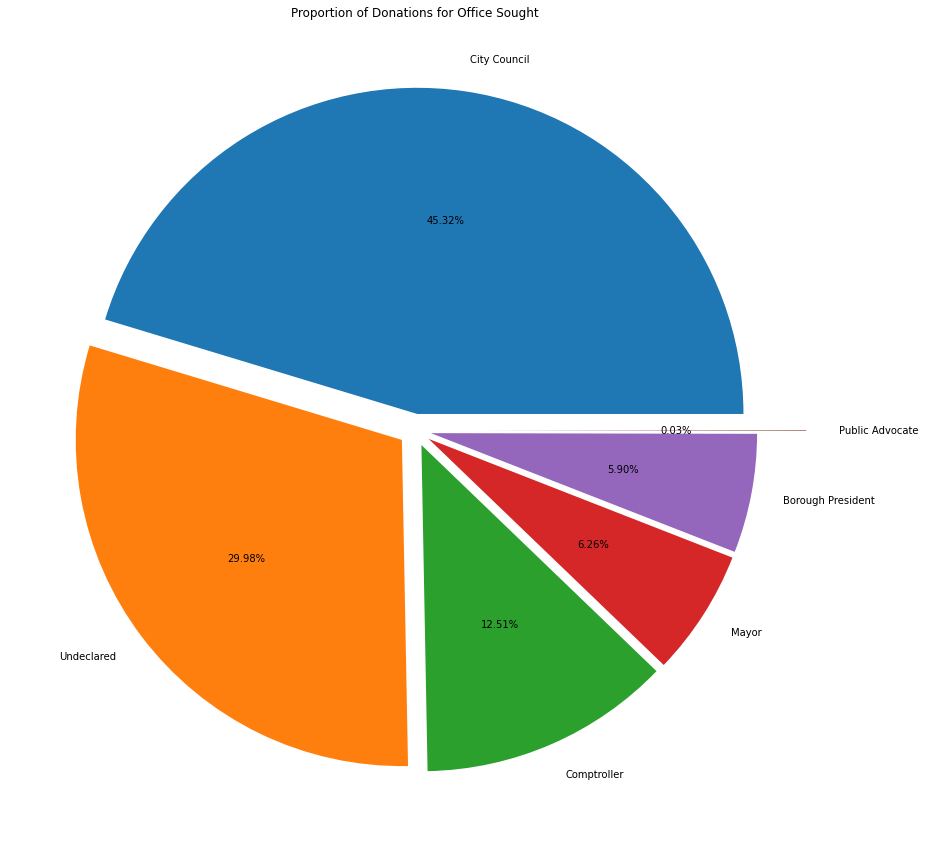

In [17]:
donations_plot = donation_data_pruned.Office.value_counts().plot(kind="pie", title="Proportion of Donations for Office Sought",
                                                                 autopct='%1.2f%%', explode=(0.05, 0.05,0.05, 0.05,0.05,0.2),
                                                                figsize=(15,15))
donations_plot.set_xlabel("")
donations_plot.set_ylabel("");

We can see that City Council donations account for almost half of all donations made, though Undeclared has a large impact on this. It may be possible that New York has many more categories of government office or these donations were filed incomplete. 

**Total Donations by Office**

We will now look at the total value of donations recieved by the office the candidate was running for.

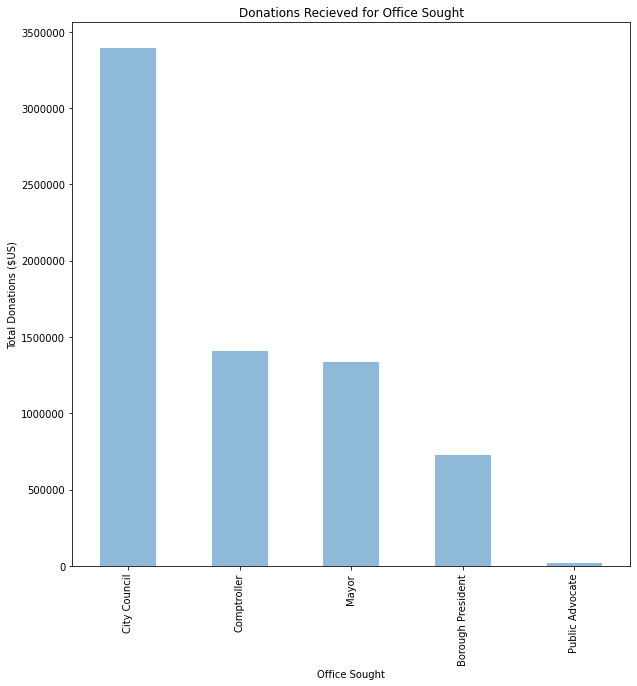

In [18]:
donation_groupby = donation_data_pruned[donation_data_pruned["Office"] != "Undeclared"].groupby('Office')
donations_amount_plot = donation_groupby['Amount'].sum().sort_values(ascending=False).plot(kind="bar", title="Donations Recieved for Office Sought",
                                                                                          figsize=(10,10), alpha=0.5)
donations_amount_plot.yaxis.get_major_formatter().set_scientific(False)
donations_amount_plot.set_xlabel("Office Sought")
donations_amount_plot.set_ylabel("Total Donations ($US)");

It seems that the most significant office to influence in New York is the City Council, with the majority of funds raised directed towards it. The New York City government is a mayor-council government model, where the City Council exists to make land use decisions, monitor the performance of its subordinate government agencies, and approve the city budget, which it has unilateral authority to do so. It would be the ideal office to donate to if your aim was to influence the policies and budget of New York.

<br>


**Average Donations**

Average donation would also be an indicator for the kind of financing these offices have access to.

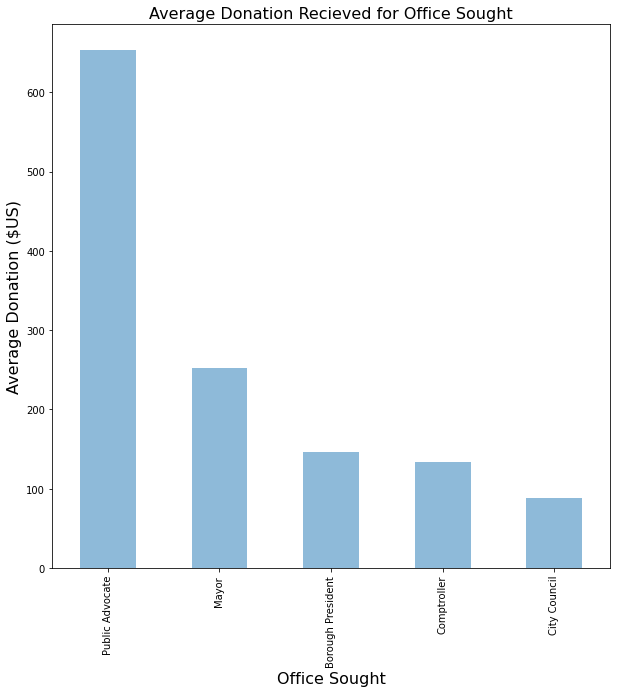

In [19]:
donation_groupby = donation_data_pruned[donation_data_pruned["Office"] != "Undeclared"].groupby('Office')
donations_amount_plot = donation_groupby['Amount'].mean().sort_values(ascending=False).plot(kind="bar", figsize=(10,10), alpha=0.5)

donations_amount_plot.set_title("Average Donation Recieved for Office Sought", fontsize=16)
donations_amount_plot.set_xlabel("Office Sought", fontsize=16)
donations_amount_plot.set_ylabel("Average Donation ($US)", fontsize=16);

Despite their low number of donations, Public Advocates have a much higher average donation. This is likely due to public advocates being a lesser known office and these are more likely to be self funded contributions.

<br>

**Occupation of Donors**

What kind of person is most likely to donate to New York politicians?

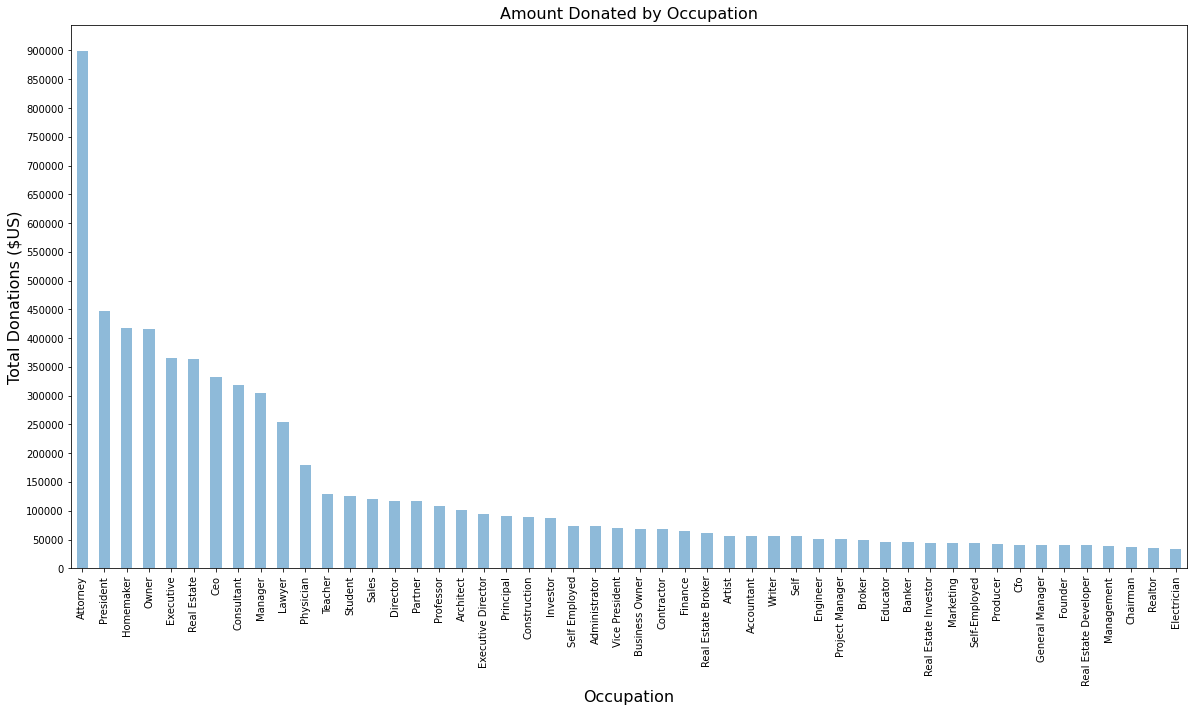

In [20]:
yticks = [i for i in range(900001) if i%50000 == 0]

employment_groupby = donation_data_pruned[(donation_data_pruned["Occupation"] != "Not Employed") & (donation_data_pruned["Occupation"] != "Retired") & (donation_data_pruned["Occupation"] != "Unemployed")].groupby("Occupation")
employment_amount_plot = employment_groupby["Amount"].sum().sort_values(ascending=False).head(50).plot(kind="bar", figsize=(20,10), alpha=0.5, yticks=yticks)

employment_amount_plot.set_title("Amount Donated by Occupation", fontsize=16)
employment_amount_plot.set_xlabel("Occupation", fontsize=16)
employment_amount_plot.set_ylabel("Total Donations ($US)", fontsize=16);

We can see that higher net worth individuals are more likely to contribute to the political process. This is intuitive, as these people are more likely to have enough disposable income to make these contributions. They also have more of an incentive to contribute than most, with business leaders more likely to want to influence legislation in their favor. Homemaker makes an interesting appearance at the 3rd highest amount donated, though I suspect this is likely to be members of the same family making two donations to contribute more money.

<br>

**Amounts Donated by Top 10 Occupations**

Let's examine more closely the donation habits of those in the top 10. First we need to account for people making multiple small donations so we will sum all donations made by Donor Name and then group them by Occupation.

In [21]:
boxplot_occupations = donation_data_pruned[(donation_data_pruned["Occupation"] != "Not Employed") & (donation_data_pruned["Occupation"] != "Retired") & (donation_data_pruned["Occupation"] != "Unemployed")].groupby("Occupation")["Amount"].sum().sort_values(ascending=False).head(10)

boxplot_occupations = boxplot_occupations.index.values.tolist()

occupation_donations = donation_data_pruned[donation_data_pruned["Occupation"].isin(boxplot_occupations)][["Occupation","Donor Name", "Amount"]]

occupation_donations = occupation_donations.set_index(["Donor Name", "Occupation"]).groupby(level=[0,1]).sum()

occupation_donations.head()

Amount
Donor Name        Occupation         
ABDULLH, AHMED    Ceo            25.0
ADAMS, MAREA      Real Estate    50.0
ADAMS, SUSAN      Attorney     1000.0
AHMED, WAQIL      Manager       275.0
ANGELILLI, LAUREN Lawyer        250.0

Now we can plot the data on a boxplot.

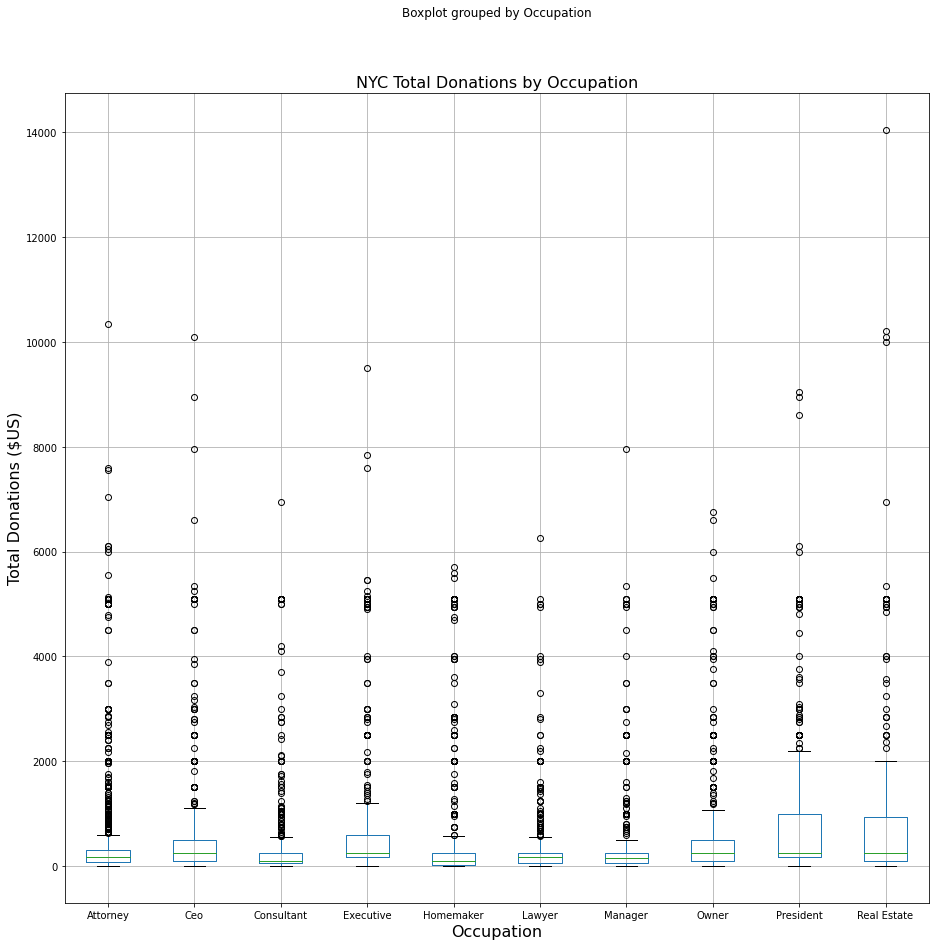

In [22]:
occupation_donations_boxplot = occupation_donations.boxplot(column='Amount', by="Occupation", figsize=(15,15))

occupation_donations_boxplot.set_title("NYC Total Donations by Occupation", fontsize=16)
occupation_donations_boxplot.set_xlabel("Occupation", fontsize=16)
occupation_donations_boxplot.set_ylabel("Total Donations ($US)", fontsize=16);

Entries that stand out to me from this boxplot are CEOs, Executives, Presidents, and those working in Real Estate. These entries have the longest whiskers indicating that more of their donations made are towards the higher end of the donation threshold. They also record the highest amounts by individual donors, with their highest donations nearing or surpassing $10000

<br>

**Top Donors**

Let's examine the characteristics of the highest contributors and determine their likely occupation. 

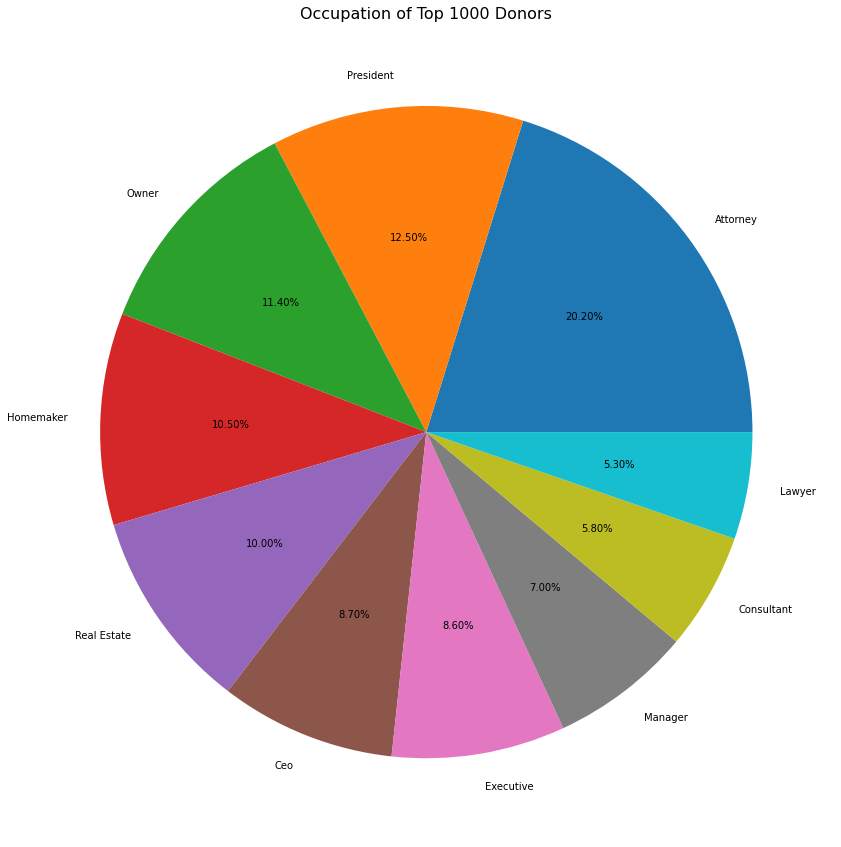

In [23]:
occupation_donations_plot = occupation_donations.sort_values("Amount", ascending=False).head(1000).value_counts("Occupation").plot(kind="pie", autopct='%1.2f%%', figsize=(15,15))

occupation_donations_plot.set_title("Occupation of Top 1000 Donors", fontsize=16)
occupation_donations_plot.set_xlabel("")
occupation_donations_plot.set_ylabel("");

Again, we see the same occupations being represented in the top 1000 donors in almost the same order they were in on the total contributions chart.

<br>

**Top 10 Donors**

Let's examine the people at the highest levels of contribution.

In [24]:
occupation_donations.sort_values("Amount", ascending=False).head(10)

Amount
Donor Name         Occupation          
Brodsky, Daniel    Real Estate  14050.0
Albstein, Andrew   Attorney     10350.0
Fisher, Kenneth    Real Estate  10200.0
Klein, John S      Real Estate  10100.0
Guzel, Murat       Ceo          10100.0
Boutross, Diana    Real Estate  10000.0
Zeckendorf, Arthur Executive     9500.0
Tsunis, George     President     9050.0
Basaranlar, Tumay  Ceo           8950.0
Montero, Jose      President     8950.0

Text(0.5, 0, 'Donor Name and Occupation')

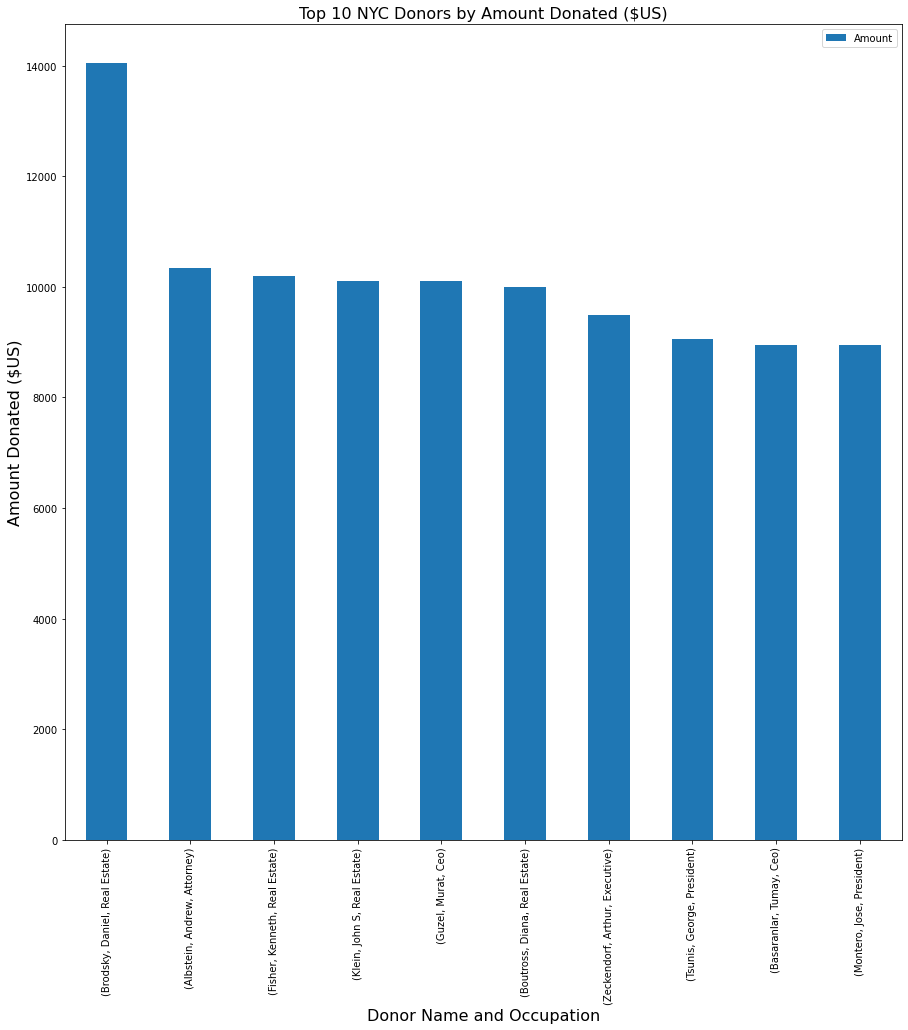

In [25]:
top_10_donor_plot = occupation_donations.sort_values("Amount",ascending=False).head(10).plot(kind="bar", figsize=(15,15))

top_10_donor_plot.set_title("Top 10 NYC Donors by Amount Donated ($US)", fontsize=16)
top_10_donor_plot.set_ylabel("Amount Donated ($US)", fontsize=16)
top_10_donor_plot.set_xlabel("Donor Name and Occupation", fontsize=16)


Below is a breakdown of who these individuals are.

| Contributor | Background |
|-------------|---------|
| Daniel Brodsky | American real estate developer, art collector, and chairman of the Metropolitan Museum of Art|
| Andrew Albstein | Managing partner at Goldberg Weprin Finkel Goldstein LLP, A New York law firm focused on real estate. 
| Kenneth Fisher | Billionare founder of Fisher Investments, a financial advisory firm |
| John S Klein | I could not find any concrete information on John S Klein |
| Murat Guzel | CEO of Nimeks organic/Natural Food Source Inc|
| Diana Boutross | Executive Managing Director of Cushman and Wakefield, a real estate firm |
| Arthur Zeckendorf | Third Generation Co-chairman of Zeckendorf Development, a family real estate empire |
| George Tsunis | Chairman and Chief Executive Officer of Chartwell Hotels |
| Tumay Basaranlar | CEO of Atlantis Management Group, a petroleum distribution company |
| Jose Montero | President of Atlantis Management Group, a petroleum distribution company | 

<br>

**Donations for 2021 Election Cycle over time**

We will now examine how the funds for this election cycle were raised over time, and try to determine the peak fundraising periods. I am assuming that all donations declared in this dataset were intended to be spent on this election. 

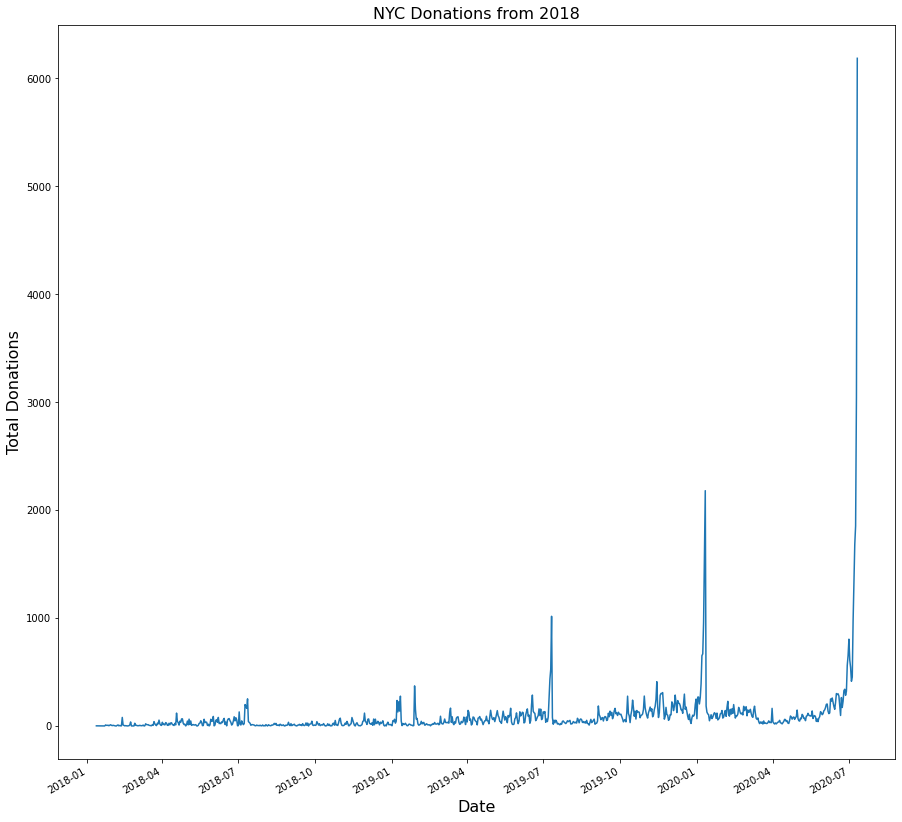

In [26]:
donation_time_series_plot = donation_data_pruned["Date"][donation_data_pruned["Date"] > '2018-01-10'].value_counts().plot(kind="line",figsize=(15,15), title="NYC Donations from 2018")


donation_time_series_plot.set_title("NYC Donations from 2018", fontsize=16)
donation_time_series_plot.set_xlabel("Date", fontsize=16)
donation_time_series_plot.set_ylabel("Total Donations", fontsize=16);

Donations for the 2021 election cycle pre 2018 are almost non existent. From 2018 onwards, fundraising occurs every 6 months in January and again in July. As the election period approaches, fundraising increases almost exponentially. I expect those candidates that had fundraising apparatuses in place were able to raise donations on a consistent basis, while less established candidates waited until the election period was upon them to raise donations.

<br>

**Amount of Donations over time**

We will now examine the value of these donations raised over time. 

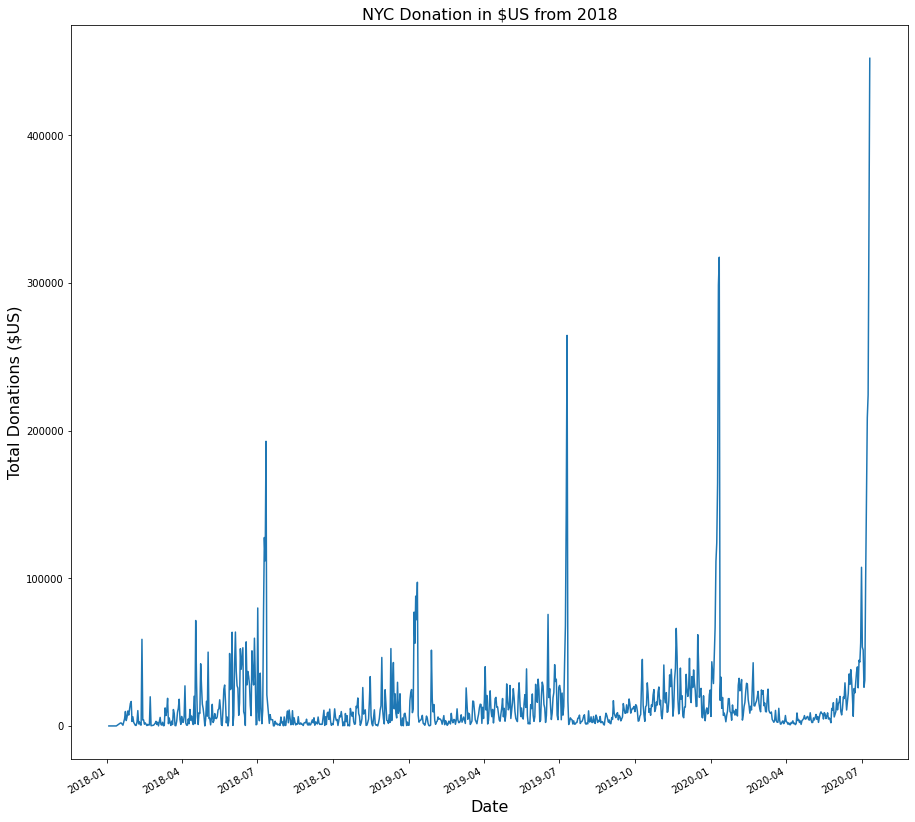

In [27]:
donation_time_series = donation_data_pruned[donation_data_pruned["Date"] > '2018-01-01'].groupby('Date')
donation_amount_time_series_plot = donation_time_series["Amount"].sum().plot(kind="line",figsize=(15,15))


donation_amount_time_series_plot.set_title("NYC Donation in $US from 2018", fontsize=16)
donation_amount_time_series_plot.set_xlabel("Date", fontsize=16)
donation_amount_time_series_plot.set_ylabel("Total Donations ($US)", fontsize=16);

It seems donations made outside the official fundrasing periods are higher than would be expected. These donations may be associated with officials making contributions to their own campaigns or arranging donations in some other way with higher net worth individuals.

<br>

**Donations over time by Office**

Let's break the donation time series down by office.

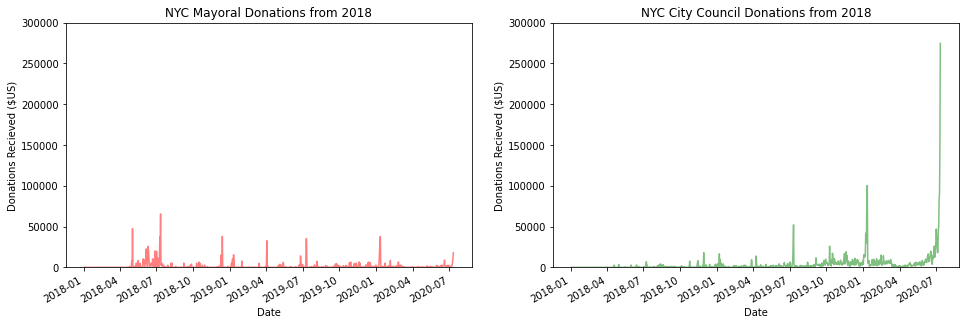

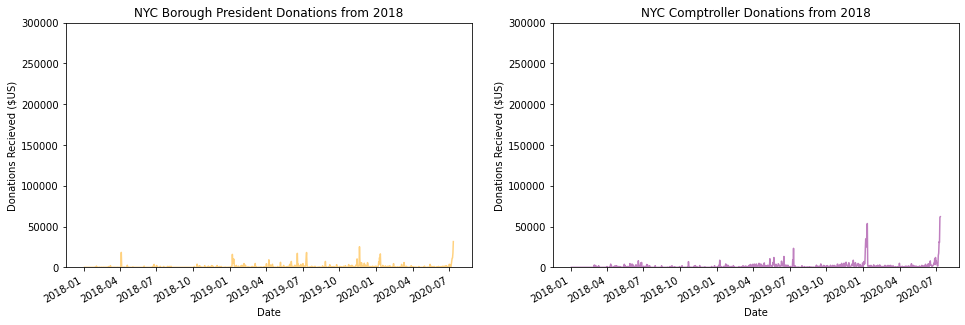

<Figure size 1152x360 with 0 Axes>

In [28]:
office_time_series = donation_data_pruned[["Date","Office","Amount"]][donation_data_pruned["Date"]>"2018-01-01"]
office_time_series_table = pd.pivot_table(office_time_series, values="Amount", index=["Date"],
                                          columns=["Office"], aggfunc=np.sum, fill_value=0)

f1 = plt.figure(figsize=(16,5));
f2 = plt.figure(figsize=(16,5));
f3 = plt.figure(figsize=(16,5));
ax1 = f1.add_subplot(121);
ax2 = f1.add_subplot(122);
ax3 = f2.add_subplot(121);
ax4 = f2.add_subplot(122);

office_time_series_plot_1 = office_time_series_table["Mayor"].plot(kind="line",ax=ax1, color="red", alpha=0.5,title="NYC Mayoral Donations from 2018", ylim=(0,300000), ylabel="Donations Recieved ($US)");
office_time_series_plot_2 = office_time_series_table["City Council"].plot(kind="line",ax=ax2, color="green", alpha=0.5,title="NYC City Council Donations from 2018", ylim=(0,300000), ylabel="Donations Recieved ($US)");
office_time_series_plot_3 = office_time_series_table["Borough President"].plot(kind="line",ax=ax3, color="orange", alpha=0.5, title="NYC Borough President Donations from 2018", ylim=(0,300000), ylabel="Donations Recieved ($US)");
office_time_series_plot_2 = office_time_series_table["Comptroller"].plot(kind="line",ax=ax4, color="purple", alpha=0.5, title="NYC Comptroller Donations from 2018", ylim=(0,300000), ylabel="Donations Recieved ($US)");

As discussed before, if you want to influence New York policy you need to influence the City Council and this figure shows it clearly. The City Council dominates in funds raised closer to the election. What is interesting is that the Mayoral donations appear to trail off closer to the election cycle. It is possible that these donations will pick up closer to the NYC mayoral elections occuring in November 2021.

<br>

**Top 10 City Council Members by Donations**

Let's examine the City Council members with the most donations.

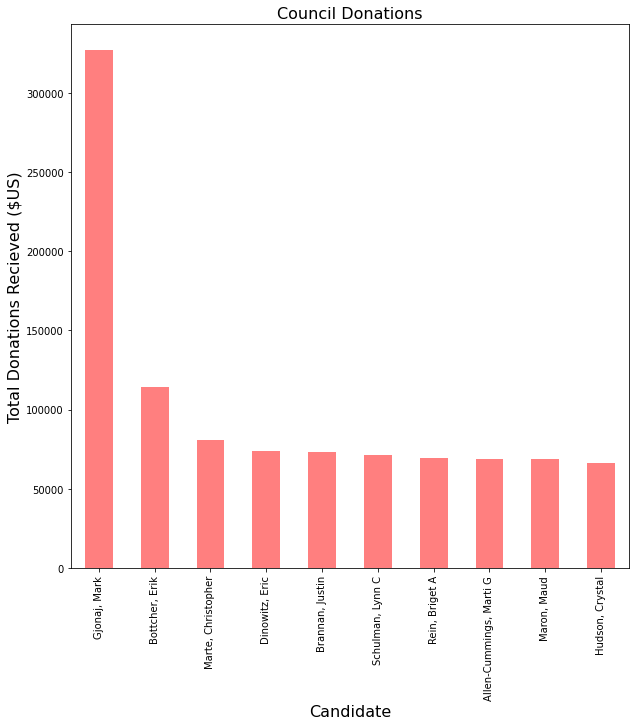

In [29]:
council_groupby = donation_data_pruned[donation_data_pruned["Office"] == "City Council"].groupby('Recipient Name')
council_donations_plot = council_groupby['Amount'].sum().sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10,10), alpha=0.5, color="red")

council_donations_plot.set_title("Council Donations", fontsize=16)
council_donations_plot.set_xlabel("Candidate", fontsize=16)
council_donations_plot.set_ylabel("Total Donations Recieved ($US)",fontsize=16);

The highest number of donations went to Mark Gjonaj, a Democratic councilor representing district 80 of the New York State Assembly, encompassing Morris Park, Pelham Parkway, Pelham Gardens, and Norwood, and other communities in the Borough of the Bronx.

**Top 10 Mayoral Candidates by Donations**

Let's do the same for Mayoral candidates.

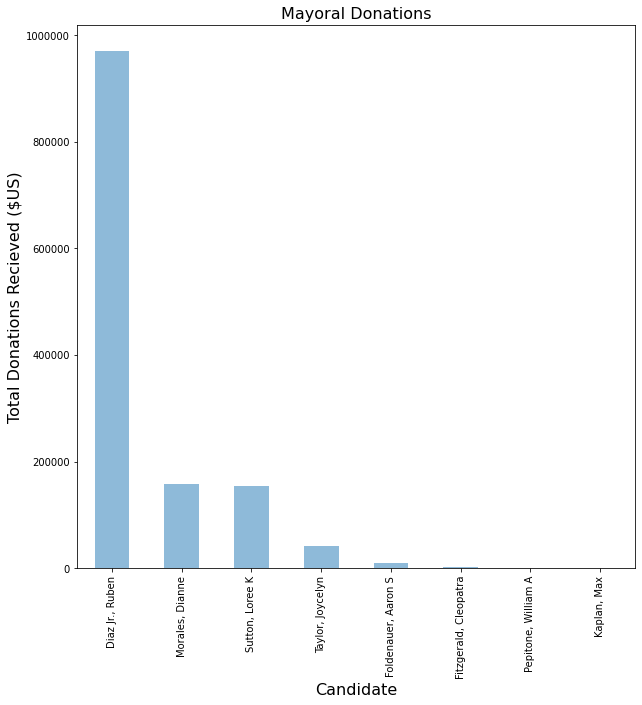

In [30]:
mayoral_groupby = donation_data_pruned[donation_data_pruned["Office"] == "Mayor"].groupby('Recipient Name')
mayoral_donations_plot = mayoral_groupby['Amount'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10,10), alpha=0.5)

mayoral_donations_plot.yaxis.get_major_formatter().set_scientific(False)
mayoral_donations_plot.set_title("Mayoral Donations", fontsize=16)
mayoral_donations_plot.set_xlabel("Candidate", fontsize=16)
mayoral_donations_plot.set_ylabel("Total Donations Recieved ($US)",fontsize=16);

The Mayoral donations are dominated by Ruben Diaz Jr. He is currently serving as Borough President of the Bronx. It is interesting to note that the highest donation amounts raise both went to candidates responsible for the Bronx region of New York. 

<br>

**Mayoral Donations over time by Candidate**

Let's examine any trends in the timing of donations, to see if there is a challenger emerging against Ruben Diaz Jr. 

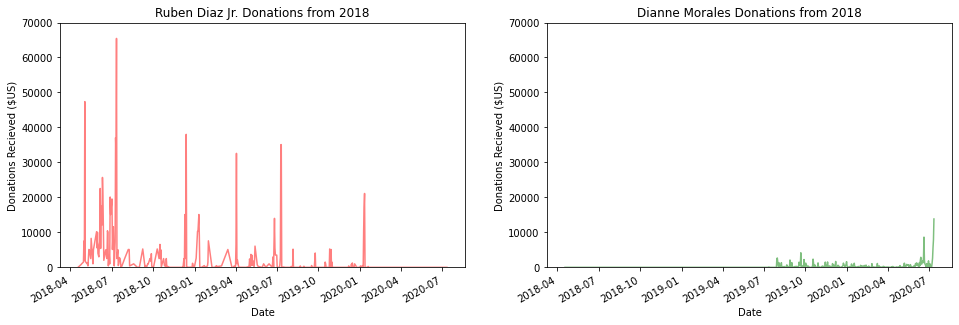

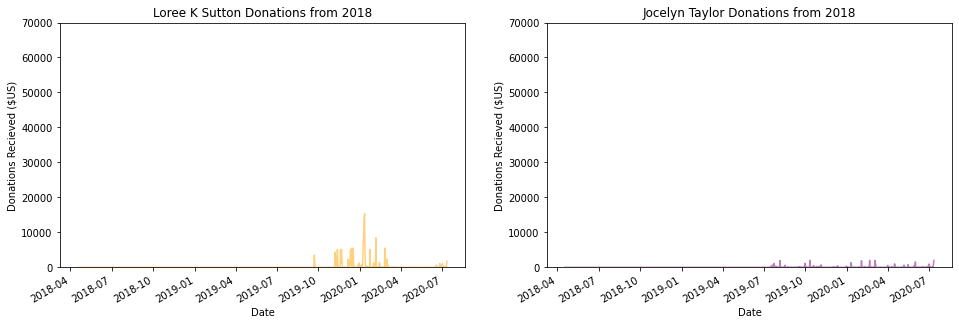

<Figure size 1152x360 with 0 Axes>

In [31]:
mayoral_candidate_donation_data = donation_data_pruned[donation_data_pruned["Office"]=="Mayor"]
mayoral_candidate_time_series = mayoral_candidate_donation_data[["Date","Recipient Name","Amount"]][donation_data_pruned["Date"]>"2018-01-01"]
mayoral_candidate_time_series_table = pd.pivot_table(mayoral_candidate_time_series, values="Amount", index=["Date"],
                                          columns=["Recipient Name"], aggfunc=np.sum, fill_value=0)


f1 = plt.figure(figsize=(16,5));
f2 = plt.figure(figsize=(16,5));
f3 = plt.figure(figsize=(16,5));
ax1 = f1.add_subplot(121);
ax2 = f1.add_subplot(122);
ax3 = f2.add_subplot(121);
ax4 = f2.add_subplot(122);

mayoral_candidate_time_series_plot_1 = mayoral_candidate_time_series_table["Diaz Jr., Ruben"].plot(kind="line",ax=ax1, color="red", alpha=0.5,title="Ruben Diaz Jr. Donations from 2018", ylabel="Donations Recieved ($US)", ylim=(0,70000));
mayoral_candidate_time_series_plot_2 = mayoral_candidate_time_series_table["Morales, Dianne"].plot(kind="line",ax=ax2, color="green", alpha=0.5,title="Dianne Morales Donations from 2018", ylabel="Donations Recieved ($US)", ylim=(0,70000));
mayoral_candidate_time_series_plot_3 = mayoral_candidate_time_series_table["Sutton, Loree K"].plot(kind="line",ax=ax3, color="orange", alpha=0.5,title="Loree K Sutton Donations from 2018", ylabel="Donations Recieved ($US)", ylim=(0,70000));
mayoral_candidate_time_series_plot_1 = mayoral_candidate_time_series_table["Taylor, Joycelyn"].plot(kind="line",ax=ax4, color="purple", alpha=0.5,title="Jocelyn Taylor Donations from 2018", ylabel="Donations Recieved ($US)", ylim=(0,70000));

Among the top 2 candidates by donations, it would seem that Ruben Diaz is on a downward trend while Dianne Morales has no donation history before July 2019. Further research has determined that Ruben Diaz dropped out of the Mayoral race in January 2021, saying he wanted to spend more time with his family.

**NYC Government Spending**

Let's now examine the Recent Contracts Data to see if there is anything interesting in New York City expenditure.

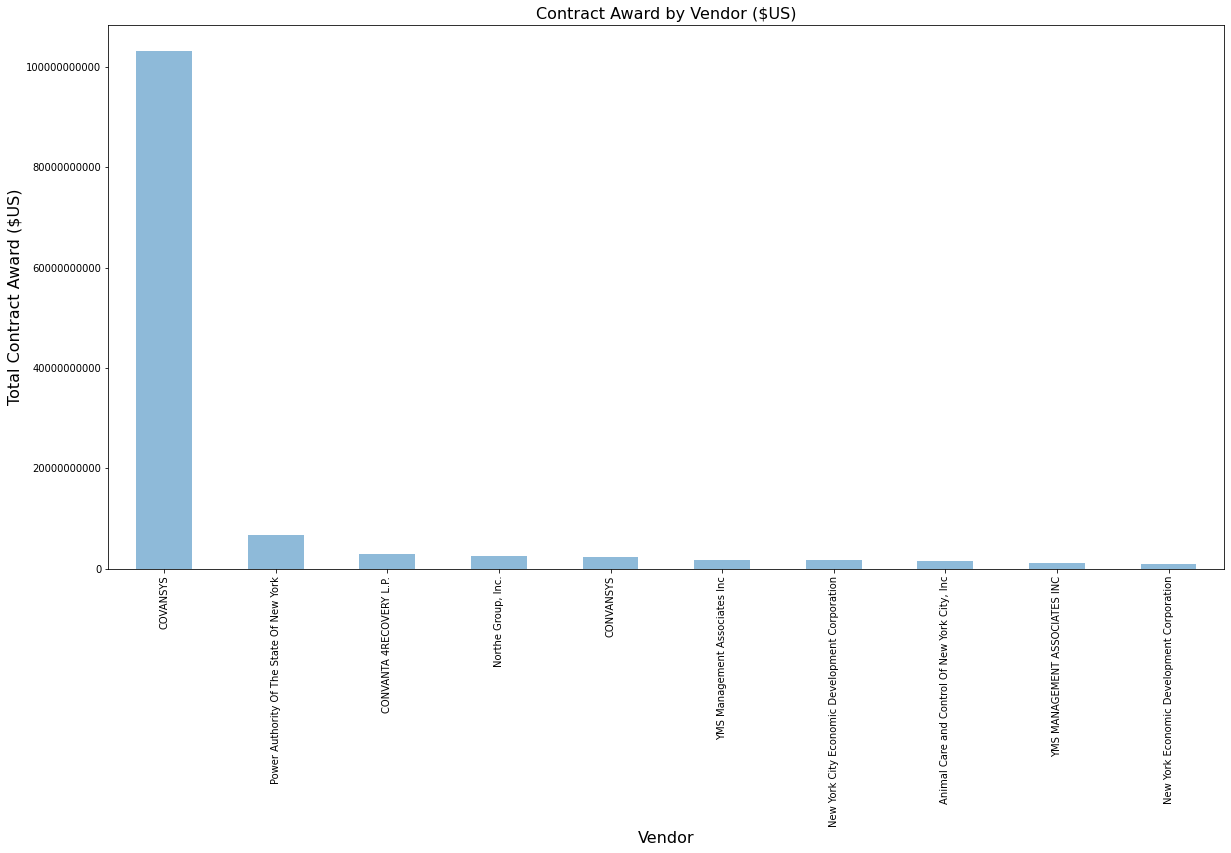

In [32]:
vendor_groupby = contract_data.groupby("VendorName")
vendor_amount_plot = vendor_groupby["ContractAmount"].sum().sort_values(ascending=False).head(10).plot(kind="bar",
                                                                                          figsize=(20,10), alpha=0.5)
vendor_amount_plot.yaxis.get_major_formatter().set_scientific(False)
vendor_amount_plot.set_title("Contract Award by Vendor ($US)", fontsize=16)
vendor_amount_plot.set_xlabel("Vendor", fontsize=16)
vendor_amount_plot.set_ylabel("Total Contract Award ($US)",fontsize=16);

When I plotted this for the first time, I jumped out of my chair. NYC has a contract totalling more than $11 billion US with a single company. I'm still not exactly sure of the circumstances behind this contract, as it appears to be a legacy contract to be paid on a continuous basis. I believe COVANSYS is responsible for all of the NYC government Software and Technology infrastructure, as that is the only explanation I can find for how large the contract is. 

In [33]:
contract_data[contract_data["VendorName"]=="COVANSYS"][["StartDate","AgencyName","SelectionMethodDescription","ContractAmount","VendorName", "Geo_Address"]]

StartDate                 AgencyName SelectionMethodDescription  \
22263  01/25/2012  Health and Mental Hygiene                    Renewal   
30132  11/05/2012  Health and Mental Hygiene                    Renewal   
33244  10/05/2012  Health and Mental Hygiene      Request for Proposals   

       ContractAmount VendorName  \
22263    1.011275e+11   COVANSYS   
30132    1.011275e+09   COVANSYS   
33244    1.011275e+09   COVANSYS   

                                                                                Geo_Address  
22263  7701, College Boulevard, Overland Park, Johnson County, Kansas, 66210, United States  
30132  7701, College Boulevard, Overland Park, Johnson County, Kansas, 66210, United States  
33244  7701, College Boulevard, Overland Park, Johnson County, Kansas, 66210, United States

In [34]:
COVANSYS_pc = float(contract_data[contract_data["VendorName"]=="COVANSYS"][["ContractAmount"]].sum()/contract_data["ContractAmount"].sum())

print("COVANSYS accounts for more than " + f'{COVANSYS_pc*100:.2f}' +"% of NYC Government spending in the Recent Contracts dataset")

COVANSYS accounts for more than 48.03% of NYC Government spending in the Recent Contracts dataset


That is an absolutely staggering amount of expenditure.

<br>

**Folium Heat Maps**

In order to produce meaningful heat maps with the data, we need to be able to set up a legend to appear on the map, as folium does not have this by default. To do this, we are going to extract the minimum and maximum values from the donation amounts and contract amounts. 

In [35]:
#Only take data with associated Geo_Address
address_heatmap_df = address_donation_data.dropna(subset=['Geo_Address'])

#Set boundary values for legend
amount_min = math.floor(address_heatmap_df["Amount"].min()/100)*100
amount_max = math.ceil(address_heatmap_df["Amount"].max()/100)*100

#Generate the branca colormap for the heatmap to work from 
colormap_1 = branca_folium_cm.LinearColormap(colors=[(0,0,255),(0,255,0),(255,0,0)],vmin=amount_min, vmax=amount_max)
colormap_1.caption = "Donation Amount ($US)"

# Prepare gradient dictionary
gradient_dict_1 = {}

# Get the index values and colors from colormap_1

for ind_val, c in zip(colormap_1.index, colormap_1.colors):
    # Create gradient dictionary for heatmap
    r, g, b, a = c
    gradient_dict_1[ind_val] = f"rgba({r},{g},{b},{a})"

#Initialise map
map_1 = folium.Map(location=[15,10],tiles='OpenStreetMap', zoom_start=2, no_wrap=True)
map_1

title_html = '''
     <head><style> html { overflow-y: hidden; } </style></head>
     <h3 align="center" style="font-size:20px"><b>Global NYC Donations</b></h3>
     ''' 

coordinate_list = list(zip(address_heatmap_df['Latitude'],address_heatmap_df['Longitude'],address_heatmap_df['Amount']))

map_1.add_child(colormap_1)

plugins.HeatMap(data=coordinate_list).add_to(map_1)

map_1.get_root().html.add_child(folium.Element(title_html))

map_1

Observing the global heatmap more closely, we can see that a higher than expected amount of addresses are falling outside of the United States. This is likely due to incomplete address data that Nominatim has returned the most likely address it has for that location. It is unclear to what extent foreign businesses do contribute to New York politics, but most of the addresses outside the US bear significant resemblance to places within the US, suggesting this is a result of incomplete address data. To improve the integrity of this analysis, we will only focus on addresses within the US.

In [36]:
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", 
               "Arizona", "California", "Colorado", "Connecticut", 
               "District of Columbia", "Delaware", "Florida", 
               "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", 
               "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", 
               "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", 
               "Mississippi", "Montana", "North Carolina", "North Dakota", 
               "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", 
               "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
               "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", 
               "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", 
               "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

state_string = "|".join(state_names)

print(state_string)

Alaska|Alabama|Arkansas|American Samoa|Arizona|California|Colorado|Connecticut|District of Columbia|Delaware|Florida|Georgia|Guam|Hawaii|Iowa|Idaho|Illinois|Indiana|Kansas|Kentucky|Louisiana|Massachusetts|Maryland|Maine|Michigan|Minnesota|Missouri|Mississippi|Montana|North Carolina|North Dakota|Nebraska|New Hampshire|New Jersey|New Mexico|Nevada|New York|Ohio|Oklahoma|Oregon|Pennsylvania|Puerto Rico|Rhode Island|South Carolina|South Dakota|Tennessee|Texas|Utah|Virginia|Virgin Islands|Vermont|Washington|Wisconsin|West Virginia|Wyoming


In [37]:
address_donation_data_US = address_donation_data.dropna(subset=['Geo_Address'])[address_donation_data["Geo_Address"].str.contains(state_string, na=False)]                                                                          
address_donation_data_US = address_donation_data_US[address_donation_data_US['Geo_Address'].str.contains("United States")]

map_2 = folium.Map(location=[40,-99 ],tiles='OpenStreetMap', zoom_start=4, max_zoom=14, no_wrap=True)

title_html = '''
     <head><style> html { overflow-y: hidden; } </style></head>
     <h3 align="center" style="font-size:20px"><b>US NYC Donations</b></h3>
     ''' 

#Folium heat maps take coordinate data in the form (Latitude, Longitude, Weights),
#where Weights will weight the coordinates based on another factor associated with
#the data. We want to weight the heatmap on the donation amount, so we will pass this
#to the coordinate list.
coordinate_list = list(zip(address_donation_data_US['Latitude'],address_donation_data_US['Longitude'],address_donation_data_US['Amount']))


map_2.add_child(colormap_1)

plugins.HeatMap(coordinate_list).add_to(map_2)

map_2.get_root().html.add_child(folium.Element(title_html))

map_2

This is much more in line with expectations, with donations mostly coming from major US population centres, which tend to contain higher net worth individuals and political insiders more likely to contribute to the political process.

<br>

**Acquisition of NYC Contracts**

Here we have done the same for the NYC Recent Contracts data.

In [38]:
contract_data_US = contract_data.dropna(subset=['Geo_Address'])[contract_data["Geo_Address"].str.contains(state_string, na=False)]                                                                          
contract_data_US = contract_data_US[contract_data_US['Geo_Address'].str.contains("United States")]
contract_data_US = contract_data_US[contract_data_US['ContractAmount']>=0]

amount_min = math.floor(contract_data_US["ContractAmount"].min()/1000000000)*1000000000
amount_max = math.ceil(contract_data_US["ContractAmount"].max()/1000000000)*1000000000

colormap_2 = branca_folium_cm.LinearColormap(colors=[(0,0,255),(0,255,0),(255,0,0)],vmin=amount_min, vmax=amount_max)
colormap_2.caption = "Contract Amount (in $US)"


gradient_dict_2 = {}

for ind_val, c in zip(colormap_2.index, colormap_2.colors):

    r, g, b, a = c
    gradient_dict_2[ind_val] = f"rgba({r},{g},{b},{a})"


map_3 = folium.Map(location=[40,-99 ],tiles='OpenStreetMap', zoom_start=4, max_zoom=14, no_wrap=True)
map_3

title_html = '''
     <head><style> html { overflow-y: hidden; } </style></head>
     <h3 align="center" style="font-size:20px"><b>US Acquisition of NYC Contracts</b></h3>
     ''' 


coordinate_list = list(zip(contract_data_US['Latitude'],contract_data_US['Longitude'],contract_data_US['ContractAmount']))

map_3.add_child(colormap_2)

map_3.get_root().html.add_child(folium.Element(title_html))

plugins.HeatMap(coordinate_list).add_to(map_3)

map_3

Close to the centre of the map, in Kansas City, there is an extremely bright spot on the heat map. This bright spot is 7701, College Boulevard, Overland Park, Johnson County, Kansas, 66210, United States, the previous headquarters of the COVANSYS Corporation. This office accounts for almost half of all NYC government expenditure.

Aside from this, we can see the distribution is fairly similar to the distribution of the donations, but it is difficult to tell if this implies a causality relationship or if this is simply due to the population distribution of the US.

<br>

**Choropleth Log Donations**

The heat map of donations can be fairly cluttered and difficult to read at times, so we will simplify it into a choropleth plot. As the amount of money donated from within New York vastly exceeds the amounts donated from other states, we will plot the base 10 logarithm of the donations and view the difference in orders of magnitude. 

In [39]:
#Regular expression to extract state from geo address data
state = re.compile(r'Alaska|Alabama|Arkansas|American Samoa|Arizona|California|Colorado|Connecticut|Delaware|District of Colombia|DC|Florida|Georgia|Guam|Hawaii|Iowa|Idaho|Illinois|Indiana|Kansas|Kentucky|Louisiana|Massachusetts|Maryland|Maine|Michigan|Minnesota|Missouri|Mississippi|Montana|North Carolina|North Dakota|Nebraska|New Hampshire|New Jersey|New Mexico|Nevada|New York|Ohio|Oklahoma|Oregon|Pennsylvania|Puerto Rico|Rhode Island|South Carolina|South Dakota|Tennessee|Texas|Utah|Virginia|Virgin Islands|Vermont|Washington|Wisconsin|West Virginia|Wyoming')

def get_state(row):
    return state.search(row["Geo_Address"]).group(0)
    
#Set new state column
address_donation_data_US['State'] = address_donation_data_US.apply(lambda row: get_state(row), axis=1)

#Sum donations by state
donations_groupby_state = address_donation_data_US.groupby("State")
us_state_donations = pd.DataFrame(donations_groupby_state['Amount'].sum()).rename(columns={"Amount":"Donations ($US)"}).reset_index()

#Sort ascending and manually set DC (for some reason not working as intended)
us_state_donations = us_state_donations.sort_values("State", ascending=True)
us_state_donations["State"][7] = "District of Columbia"

us_state_donations.head()

State  Donations ($US)
0     Alabama          9410.00
1      Alaska           525.00
2     Arizona          6755.00
3    Arkansas           230.00
4  California        119265.55

For Folium to interpret this data correctly, we require the USPS state codes that will map to a geojson file of the us states that will be imported later. We need to ensure that all states have a value associated or Folium will not be able to process the missing values. 

In [40]:
#Set ordered USPS_Code list
USPS_code = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC',
             'DE', 'FL', 'GA', 'HI', 'IL', 'IN', 'IA', 'KS',
             'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
             'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 
             'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 
             'SC', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 
             'WI', 'WY']

#Pass to DataFrame
us_state_donations["State Code"] = USPS_code

us_state_donations = us_state_donations[["State Code","State","Donations ($US)"]]

#As NY donations dominate all others, we will take the log to see the orders of magnitude
#for donation revenue moving to New York
us_state_donations["Log Donations"] = us_state_donations.apply(lambda row: np.log10(row["Donations ($US)"]),axis=1) 

#Set states with no donations made
no_donation = pd.DataFrame([["ID","Idaho",0,np.nan],["SD","South Dakota",0,np.nan]], columns=["State Code","State","Donations ($US)","Log Donations"])

us_state_donations = us_state_donations.append(no_donation).reset_index(drop=True)

us_state_donations.rename(columns={"State Code":"state", "State":"name"})

us_state_donations

State Code                 State  Donations ($US)  Log Donations
0          AL               Alabama          9410.00       3.973590
1          AK                Alaska           525.00       2.720159
2          AZ               Arizona          6755.00       3.829625
3          AR              Arkansas           230.00       2.361728
4          CA            California        119265.55       5.076515
5          CO              Colorado         10177.20       4.007628
6          CT           Connecticut         73827.20       4.868216
7          DC  District of Columbia          4780.00       3.679428
8          DE              Delaware          5670.00       3.753583
9          FL               Florida         60413.00       4.781130
10         GA               Georgia         17556.21       4.244431
11         HI                Hawaii           200.00       2.301030
12         IL              Illinois         27271.21       4.435704
13         IN               Indiana          3925.00       3.593840
14         IA                  Iowa          3530.00       3.547775
15         KS                Kansas          7220.00       3.858537
16         KY              Kentucky          4155.00       3.618571
17         LA             Louisiana          3416.00       3.533518
18         ME                 Maine           865.00       2.937016
19         MD              Maryland         25491.00       4.406387
20         MA         Massachusetts        118922.41       5.075264
21         MI              Michigan         46791.00       4.670162
22         MN             Minnesota         17147.00       4.234188
23         MS           Mississippi          4830.00       3.683947
24         MO              Missouri         16276.00       4.211548
25         MT               Montana          1125.00       3.051153
26         NE              Nebraska          1473.00       3.168203
27         NV                Nevada         12300.00       4.089905
28         NH         New Hampshire          8260.00       3.916980
29         NJ            New Jersey        306481.42       5.486404
30         NM            New Mexico          1350.00       3.130334
31         NY              New York       8928960.97       6.950801
32         NC        North Carolina         30640.00       4.486289
33         ND          North Dakota           100.00       2.000000
34         OH                  Ohio         13413.20       4.127532
35         OK              Oklahoma           881.00       2.944976
36         OR                Oregon         25168.00       4.400849
37         PA          Pennsylvania         61612.00       4.789665
38         PR           Puerto Rico          5000.00       3.698970
39         RI          Rhode Island         13945.00       4.144419
40         SC        South Carolina          8964.00       3.952502
41         TN             Tennessee          7598.00       3.880699
42         TX                 Texas         30634.42       4.486210
43         UT                  Utah          1731.00       3.238297
44         VT               Vermont          5009.00       3.699751
45         VA              Virginia         24627.00       4.391412
46         WA            Washington        267264.51       5.426941
47         WV         West Virginia           250.00       2.397940
48         WI             Wisconsin         15133.00       4.179925
49         WY               Wyoming           625.00       2.795880
50         ID                 Idaho             0.00            NaN
51         SD          South Dakota             0.00            NaN

In [41]:
#We require json to handle the state borders taken from the folium geojson archives
import json

#Import the geojson file
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
us_states = f"{url}/us-states.json"

us_states

#Set bins on $10^n donated
bins=[0,1,2,3,4,5,6,7]

map_5 = folium.Map(location=[39.82,-98.57 ], zoom_start=4, no_wrap=True)

#Generate Choropleth map
folium.Choropleth(
    geo_data=us_states,
    name="chloropleth",
    data=us_state_donations,
    columns=["State Code","Log Donations"],
    key_on="feature.id",
    bins=bins,
    legend_name="Total Donation ($10^n US)").add_to(map_5)

folium.LayerControl().add_to(map_5)


map_5


We can see that the choropleth map brings us to the same conclusion as the heat map, that political donations are mostly made from states with major population centres. There seems to be no distinction whether a donation comes from a so called "Blue state" or "Red state", it is all dependent on the concentration of the population. 

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>5. Results/Insights</h1>


**Political Donations**

The donation cap of \\$1000 for individuals who were not candidates seems to have smoothed
contributions for individual donations. Even at the upper end of the donations by occupation, most people contributed less than \\$1000.

From the Donations over Time graph, I can see that fundraising cycles occur every 6 months, and the
amounts raised are increasing at a positive linear growth rate. As this dataset deals with donations
for the 2021 election year, this is likely due to more established candidates having a more consistent
and long running fundraising apparatus, accounting for the growth in donations up to the election
period. During this period, members of the public outside of this apparatus are more likely to make
donations, and smaller independent candidates will also solicit donations closer to this period.
We can observe from the US data with an associated employment address, most donations to NY
government officials come from within New York. There are significant contributions from Seattle in
Washington State and small pockets over other cities within the US. The donations were more
evenly distributed over New York than I had expected, though I believe this is due to the donation
cap of \\$5100.

<br>

**Contract Awards**

Interestingly, the geographic distribution of NYC contracts is much more decentralised than I would have anticipated. The major exception to this is the COVANSYS contract, a Kansas based company that was taken
over by a larger conglomerate. What appears to be a legacy contract dwarfs all other New York
government spending, at a cost of more than $10 billion US over the life of the contract. This
datapoint is so large it completely skewed my analysis.
While there is evidence of a trend where interstate contractors from Democrat run states appear to
be favoured than those in Republican run states, this is more likely due to the concentration of
populations in major city centres, which tend to lean Democrat anyway.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>6. In Hindsight...</h1>



**Challenges**

Government departments are usually notorious for having poorly maintained records, and the larger
the government body, the worse condition their records will be in. I am pleased to report that NYC
conforms to this stereotype perfectly. I severely underestimated the task of cleaning this dataset
and formatting the addresses into usable geodata.

<br>

**Programming Techniques and References**

This project gave me an appreciation for how powerful pandas is as a data analysis tool. The ability to break the data down into small manageable objects using pivot tables and multi-indexing was invaluable for some of the more complex analyses I attempted. I have a different relationship with regular expressions.
<blockquote>Some people, when confronted with a problem, think <em>"I know, I'll use regular expressions".</em> <br>Now they have two problems.</blockquote>
How about ten thousand problems. For every address I successfully repaired using regular expressions, I'm almost certain I broke 2 more. This is more an inditement on the state of NYC's address data, but I struggled so hard with getting the addresses into a  format Nominatim could process. The amount of times I surveyed the Global Donation map to see a 'Brooklyn NSW' or a '21st Street, Dubai' almost drove me to madness. What irritaited me more about it is that I can't conclusively prove those addresses weren't the origin of those donations. If I were to attempt it again, I would ensure I used the Borough code (if it was filled in) to restrict addresses that may have fallen out of the New York area to remain in New York.

Though I'm still working to understand it, I really enjoyed producing maps with Folium. I was surprised at how easy it was to produce functional heat maps once I understood the examples. I will definitely be making use of it in the future and working to improve my skills with it.

<br>
    
**Obtaining Address Data**
  
As New York is a well-established US city with many ties to its colonial history in Britain and Europe,
many names and conventions are not only borrowed from this history but used by other cities as
well. I suspect that every donation that Nominatim marked as ‘Brooklyn, NSW’ was an incomplete
filing of a New York address. I cannot conclusively say that Nominatim is wrong, but it seems more
prudent to exclude this point from the geographical analysis.
Nominatim is also incapable of recognising some aspects of an address, particularly the suburb. I
decided to strip this out to avoid confusing it and this increased my usable geodata by a significant
amount. I suspect that this also contributed to many data points being marked incorrectly, as I had
removed an important element of the address Nominatim could filter on.
Obtaining the geocode was a monumental task. I had more than 40,000 unique addresses across
both datasets and Nominatim only permitted one request per second. This process took a total of
two days accounting for initial failed attempts.
If I were to do this project again, I would have included the `BOROUGHCD` parameter and converted
that into a borough that Nominatim could recognise. I suspect this would reduce the number of
addresses falling outside New York and the US more generally but would create no improvement on
addresses where this code was not included.

<br>
    
**Gaining Insights into the Data**
    
In a dataset this poorly maintained, it is difficult to draw concrete conclusions. The data makes no
reference to whether the candidate was elected to their office or not, which would have been useful
to determine how the current government’s election campaign was financed.
Columns I believed I could gain valuable insight from turned out to be useless. One example of this
was the `C_CODE` column. This column is designed to be a declaration of what kind of entity is
donating money. In reality, every donation filing either left this entry blank or declared themselves
an independent (`IND`). This infers that no business donated money to any New York politicians at any
level of government. While this is potentially true, I suspect the incomplete nature of the dataset to
be the culprit.

<br>
    
**Geo Analysis and its Limitations**
    
The geographic analysis was the focus of my exploration of the data. I wanted to determine if there
was any overlap between certain regions donating money and receiving contracts in return. As
discussed previously, the address data obtained through Nominatim was at best unreliable. This
made drawing concrete conclusions from these heat maps difficult. Due to the difficulties I had in
determining exact addresses, I decided I could only trust addresses from within the US.

Folium as tool for geoanalysis is incredibly powerful, but I am not yet experienced enough to
undertake an analysis that makes use of all its features. Simple functionality like defining an accurate
legend escaped me, and I feel as though the Folium maps were more hacked together than naturally
coded. I had originally intended to include other Folium plots and improve my existing ones, such as a heat map with a time series or including a highlight overlay on the choropleth map that displayed the amount donated by that state. Both of these were attempted but ultimately proved to complicated and too far beyond the scope of the original project. 